In [1]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gas = ct.Solution('gri30.xml')
pressure = np.linspace(1, 5, 9)
T_int = 1250
time_start = 0.0
time_end = 10.0
time_step = 1e-3

In [3]:
n = int((time_end - time_start)/time_step)
t_autoI_P = []
states1 = []

t [s]      T [K]      P [Pa]    
 1.000e-03  1.250e+03  1.013e+05 
 2.000e-03  1.250e+03  1.013e+05 
 3.000e-03  1.250e+03  1.014e+05 
 4.000e-03  1.251e+03  1.014e+05 
 5.000e-03  1.251e+03  1.014e+05 
 6.000e-03  1.252e+03  1.015e+05 
 7.000e-03  1.252e+03  1.015e+05 
 8.000e-03  1.253e+03  1.016e+05 
 9.000e-03  1.254e+03  1.016e+05 
 1.000e-02  1.255e+03  1.017e+05 
 1.100e-02  1.256e+03  1.018e+05 
 1.200e-02  1.257e+03  1.019e+05 
 1.300e-02  1.259e+03  1.021e+05 
 1.400e-02  1.261e+03  1.022e+05 
 1.500e-02  1.264e+03  1.024e+05 
 1.600e-02  1.267e+03  1.027e+05 
 1.700e-02  1.271e+03  1.031e+05 
 1.800e-02  1.277e+03  1.036e+05 
 1.900e-02  1.287e+03  1.044e+05 
 2.000e-02  1.304e+03  1.058e+05 
 2.100e-02  1.353e+03  1.100e+05 
 2.200e-02  2.843e+03  2.410e+05 
 2.300e-02  2.837e+03  2.404e+05 
 2.400e-02  2.836e+03  2.403e+05 
 2.500e-02  2.836e+03  2.403e+05 
 2.600e-02  2.836e+03  2.403e+05 
 2.700e-02  2.836e+03  2.403e+05 
 2.800e-02  2.836e+03  2.403e+05 
 2.900e-02  2.8

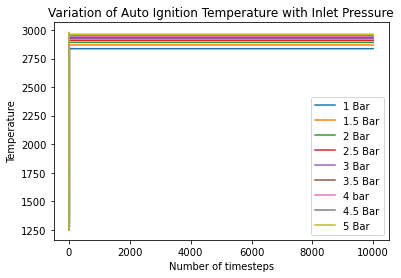

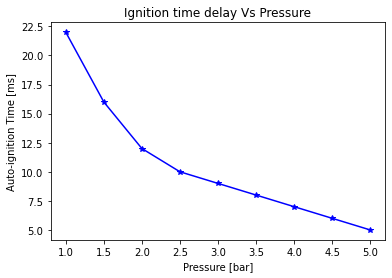

In [4]:
for i in pressure:
    gas.TPX = T_int, i*101325, {'CH4':1, 'O2':2, 'N2': 7.52}
    T_autoI = 0
    t_autoI = 0
    time = 0
    r = ct.IdealGasReactor(gas)
    sim = ct.ReactorNet([r])
    states = ct.SolutionArray(gas, extra=['time_in_ms', 't'])
    print('{:10s} {:10s} {:10s}'.format('t [s]', 'T [K]','P [Pa]'))
    
    for n in range(n):
        time += 1e-3
        sim.advance(time)
        states.append(r.thermo.state, time_in_ms = time*1e3,t = time)
        print('{:10.3e} {:10.3e} {:10.3e} '.format(sim.time, r.T, r.thermo.P))
    states1.append(states.T)
    
    for i in range(n):
        T_error = states.T[i] - T_int - 400
        if T_error > 0:
            T_autoI = states.T[i]
            t_autoI = states.time_in_ms[i]
            break
    t_autoI_P.append(t_autoI)

states1 = np.array(states1)
for k in range(len(pressure)): 
    plt.figure(1)
    plt.plot(states1[k])
    plt.xlabel("Number of timesteps")
    plt.ylabel('Temperature')
    plt.title('Variation of Auto Ignition Temperature with Inlet Pressure')
    plt.legend (['1 Bar', '1.5 Bar', '2 Bar', '2.5 Bar', '3 Bar', '3.5 Bar', '4 bar', '4.5 Bar', '5 Bar'])

plt.figure(2)
plt.plot(pressure,t_autoI_P, 'b-*')
plt.xlabel('Pressure [bar]')
plt.ylabel('Auto-ignition Time [ms]')
plt.title("Ignition time delay Vs Pressure")
plt.show()